# Create a choropleth map with Folium
1. Import libraries
2. Wrangle data
3. Clean data
4. Create choropleth map

# 1. Import libraries

In [21]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import os
import folium
import json

In [22]:
# This command propts matplotlib visuals to appear in the notebook 

%matplotlib inline

In [23]:
# Import Berlin .json file
country_geo = r'/Users/OldBobJulia/Desktop/CF/Course/6. Advanced Analytics and Dashboard Design/Berlin Airbnb Analysis/02 Data/Original data/berlin_bezirke.json'

In [24]:
# Look at it
f = open(r'/Users/OldBobJulia/Desktop/CF/Course/6. Advanced Analytics and Dashboard Design/Berlin Airbnb Analysis/02 Data/Original data/berlin_bezirke.json',)
data = json.load(f)
for i in data['features']:
    print(i)

{'type': 'Feature', 'properties': {'name': 'Mitte', 'description': '', 'cartodb_id': 1, 'created_at': '2013-09-03T12:32:04+0200', 'updated_at': '2013-09-03T12:32:04+0200'}, 'geometry': {'type': 'MultiPolygon', 'coordinates': [[[[13.403528, 52.540212], [13.404195, 52.540402], [13.404705, 52.540188], [13.405134, 52.539287], [13.405178, 52.539195], [13.405357, 52.538837], [13.405303, 52.538826], [13.405363, 52.538711], [13.405415, 52.538721], [13.405519, 52.538514], [13.405462, 52.538502], [13.405814, 52.537784], [13.405885, 52.537797], [13.406032, 52.537505], [13.406069, 52.537432], [13.406143, 52.537284], [13.406402, 52.536779], [13.406546, 52.536496], [13.406578, 52.536435], [13.406708, 52.53618], [13.406748, 52.536101], [13.406782, 52.536022], [13.406918, 52.53571], [13.407486, 52.53469], [13.408116, 52.53444], [13.40835, 52.534348], [13.408181, 52.534175], [13.407683, 52.53366], [13.407336, 52.533301], [13.407162, 52.533113], [13.406424, 52.532348], [13.406362, 52.532067], [13.406103

File has a geometry column AND a LABEL.  

In [25]:
# Import Airbnb data
df = pd.read_csv(r'/Users/OldBobJulia/Desktop/CF/Course/6. Advanced Analytics and Dashboard Design/Berlin Airbnb Analysis/02 Data/Prepared data/listing_derivedcolumns.csv')

In [26]:
df.head()

,Unnamed: 0,neighbourhood_group,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,Price category,Rental availability,Host type
0,0,Mitte,52.54433,13.39761,Private room,28.0,60,18,0.21,3,101,Low price,Middle term,Commercial host
1,1,Mitte,52.53305,13.40394,Entire home/apt,74.0,90,141,2.20,6,357,Low price,Long term,Commercial host
2,2,Pankow,52.53471,13.41810,Entire home/apt,90.0,62,147,1.14,1,254,Middle price,Long term,Private host
3,3,Tempelhof - Schöneberg,52.49884,13.34940,Private room,29.0,7,27,0.28,1,285,Low price,Long term,Private host
4,4,Friedrichshain-Kreuzberg,52.51163,13.45289,Entire home/apt,79.0,7,135,1.02,1,0,Low price,Short term,Private host


In [27]:
# Drop Unnamed: 0 
df = df.drop(columns = ['Unnamed: 0'])

In [28]:
df.head()

,neighbourhood_group,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,Price category,Rental availability,Host type
0,Mitte,52.54433,13.39761,Private room,28.0,60,18,0.21,3,101,Low price,Middle term,Commercial host
1,Mitte,52.53305,13.40394,Entire home/apt,74.0,90,141,2.20,6,357,Low price,Long term,Commercial host
2,Pankow,52.53471,13.41810,Entire home/apt,90.0,62,147,1.14,1,254,Middle price,Long term,Private host
3,Tempelhof - Schöneberg,52.49884,13.34940,Private room,29.0,7,27,0.28,1,285,Low price,Long term,Private host
4,Friedrichshain-Kreuzberg,52.51163,13.45289,Entire home/apt,79.0,7,135,1.02,1,0,Low price,Short term,Private host


In [29]:
df.shape

(19095, 13)

In [30]:
df['neighbourhood_group'].value_counts(dropna=False)

Friedrichshain-Kreuzberg    4197
Mitte                       4173
Pankow                      2981
Neukölln                    2608
Charlottenburg-Wilm.        1567
Tempelhof - Schöneberg      1371
Treptow - Köpenick           620
Lichtenberg                  612
Steglitz - Zehlendorf        415
Reinickendorf                271
Marzahn - Hellersdorf        142
Spandau                      138
Name: neighbourhood_group, dtype: int64

# 2. Wrangle data

In [31]:
# Select only necessary columns for choropleth map
columns = ["neighbourhood_group", "latitude", "longitude", "room_type", "price"]

In [32]:
# Create subset with only these columns 
df_2 = df[columns]

In [33]:
df_2.head()

,neighbourhood_group,latitude,longitude,room_type,price
0,Mitte,52.54433,13.39761,Private room,28.0
1,Mitte,52.53305,13.40394,Entire home/apt,74.0
2,Pankow,52.53471,13.41810,Entire home/apt,90.0
3,Tempelhof - Schöneberg,52.49884,13.34940,Private room,29.0
4,Friedrichshain-Kreuzberg,52.51163,13.45289,Entire home/apt,79.0


In [34]:
# Make histogram of price to see what price categories could work.
# Make subset of price excluding extreme prices to that end 
price_cat_check = df_2[df_2['price'] < 4000]

In [35]:
price_cat_check.head()

,neighbourhood_group,latitude,longitude,room_type,price
0,Mitte,52.54433,13.39761,Private room,28.0
1,Mitte,52.53305,13.40394,Entire home/apt,74.0
2,Pankow,52.53471,13.41810,Entire home/apt,90.0
3,Tempelhof - Schöneberg,52.49884,13.34940,Private room,29.0
4,Friedrichshain-Kreuzberg,52.51163,13.45289,Entire home/apt,79.0


In [36]:
price_cat_check.shape

(19093, 5)

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='price', ylabel='Density'>

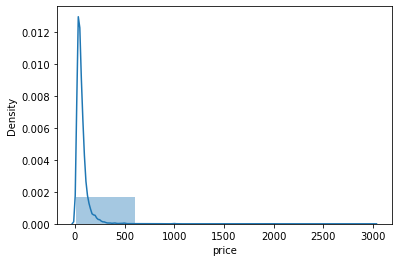

In [37]:
sns.distplot(price_cat_check['price'], bins = 5)

In [38]:
# Wrangle neighbourhood_group names to fit json data 
df_2['neighbourhood_group'].value_counts(dropna=False)

Friedrichshain-Kreuzberg    4197
Mitte                       4173
Pankow                      2981
Neukölln                    2608
Charlottenburg-Wilm.        1567
Tempelhof - Schöneberg      1371
Treptow - Köpenick           620
Lichtenberg                  612
Steglitz - Zehlendorf        415
Reinickendorf                271
Marzahn - Hellersdorf        142
Spandau                      138
Name: neighbourhood_group, dtype: int64

In [40]:
df_2['neighbourhood_group'] = df_2['neighbourhood_group'].replace({'Charlottenburg-Wilm.': 'Charlottenburg-Wilmersdorf', 'Tempelhof - Schöneberg': 'Tempelhof-Schöneberg', 'Treptow - Köpenick': 'Treptow-Köpenick', 'Steglitz - Zehlendorf': 'Steglitz-Zehlendorf', 'Marzahn - Hellersdorf': 'Marzahn-Hellersdorf'})

<ipython-input-40-47745134985b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2['neighbourhood_group'] = df_2['neighbourhood_group'].replace({'Charlottenburg-Wilm.': 'Charlottenburg-Wilmersdorf', 'Tempelhof - Schöneberg': 'Tempelhof-Schöneberg', 'Treptow - Köpenick': 'Treptow-Köpenick', 'Steglitz - Zehlendorf': 'Steglitz-Zehlendorf', 'Marzahn - Hellersdorf': 'Marzahn-Hellersdorf'})


In [41]:
df_2.head()

,neighbourhood_group,latitude,longitude,room_type,price
0,Mitte,52.54433,13.39761,Private room,28.0
1,Mitte,52.53305,13.40394,Entire home/apt,74.0
2,Pankow,52.53471,13.41810,Entire home/apt,90.0
3,Tempelhof-Schöneberg,52.49884,13.34940,Private room,29.0
4,Friedrichshain-Kreuzberg,52.51163,13.45289,Entire home/apt,79.0


In [42]:
df_2['neighbourhood_group'].value_counts(dropna=False)

Friedrichshain-Kreuzberg      4197
Mitte                         4173
Pankow                        2981
Neukölln                      2608
Charlottenburg-Wilmersdorf    1567
Tempelhof-Schöneberg          1371
Treptow-Köpenick               620
Lichtenberg                    612
Steglitz-Zehlendorf            415
Reinickendorf                  271
Marzahn-Hellersdorf            142
Spandau                        138
Name: neighbourhood_group, dtype: int64

# 3. Check consistency

In [43]:
# Check for missings
df_2.isnull().sum()

neighbourhood_group    0
latitude               0
longitude              0
room_type              0
price                  0
dtype: int64

There are no missing values

In [44]:
# Check for duplicates
dups = df_2.duplicated()

In [45]:
dups.shape

(19095,)

There are no dups

In [46]:
# Check outliers 
df_2.describe()

,latitude,longitude,price
count,19095.000000,19095.000000,19095.00000
mean,52.510215,13.404654,72.08474
std,0.032391,0.062953,93.21170
min,52.340070,13.097150,8.00000
25%,52.489710,13.367160,35.00000
50%,52.509950,13.414090,52.00000
75%,52.533320,13.438900,81.00000
max,52.656110,13.757370,4000.00000


3 observations with prices over 4000 were imputed with the mean previously

In [49]:
# Check how many rows with price under 15
super_low_price = df_2[df_2['price'] < 15]

In [50]:
super_low_price.shape

(154, 5)

In [51]:
super_low_price.head()

,neighbourhood_group,latitude,longitude,room_type,price
714,Mitte,52.56226,13.33323,Private room,12.0
867,Friedrichshain-Kreuzberg,52.50958,13.45471,Private room,10.0
881,Friedrichshain-Kreuzberg,52.49853,13.46573,Private room,10.0
1053,Friedrichshain-Kreuzberg,52.51215,13.43820,Private room,8.0
1382,Neukölln,52.42158,13.48655,Private room,10.0


I find it surprisingly many, still these rows are less than 10% of the total data set AND they remain within the reasonable price, so I leave them. 

# 4. Plot choropleth map

In [52]:
data_to_plot = df_2[['neighbourhood_group','price']]
data_to_plot.head()

,neighbourhood_group,price
0,Mitte,28.0
1,Mitte,74.0
2,Pankow,90.0
3,Tempelhof-Schöneberg,29.0
4,Friedrichshain-Kreuzberg,79.0


In [53]:
# Setup a folium map at a high-level zoom
map = folium.Map(location=[52.520, 13.404], width=750, height=500)

folium.Choropleth(
    geo_data = country_geo, 
    data = data_to_plot,
    columns = ['neighbourhood_group', 'price'],
    key_on = 'feature.properties.name',
    fill_color = 'PuBuGn', fill_opacity=0.6, line_opacity=0.1,
    legend_name = "price").add_to(map)
folium.LayerControl().add_to(map)

map

In [54]:
# Save it
map.save("index.html")

In [55]:
# Export as png just in case
map.save("map2.png")

The map answers the question which neighbourhoods are the most popular ones, or where most money can be made through Airbnb rentals. The answer is Friedrichshain-Kreuzberg, followed by Tempelhof-Schöneberg and Charlottenburg-Wilmersdorf. 

New research question: 
- Does the number of commercial hosts influence the popularity of a neighbourhood?